**Principal Component Analysis**

You will implement dimensionality reduction with PCA.  

1). Read iris_dataset.csv (4 features, hence 4 PCs) and remove the first class

2). Find the principal components

3). Recontruct the dataset (X_hat)

4). Determine the accuracy of X_hat for 1-4 PCs using a LBF SVM classifier (provided)


In [ ]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.svm import SVC # This package will help you run the SVM model directly
from sklearn.metrics import accuracy_score # Use accruacy_score to find out accuracy of your model
from sklearn.model_selection import train_test_split

# Load data - 150 observations, 4 features, 3 classes
df = pd.read_csv("iris_dataset.csv", header=None)
data = df.values

# Remove the first class and change the class index
X_raw = data[50:,0:4]               # From 150 to 100 samples
y = np.subtract(data[50:,4],2)  # From class 2/3 to class 0/1

SVM classifier (with 20% of the data as the test sets)

In [ ]:
def svm_accuracy(X_hat, y, num_pc):
    X_train, X_test, y_train, y_test = train_test_split(X_hat, y, test_size=0.2)

    clf = SVC(kernel='linear') # Use the linear function of the SVM algorithm
    clf.fit(X_train,y_train) # Train the model using the x_train and y_train
    y_pred = clf.predict(X_test) # Run prediction after training on the testing dataset
    accuracy = accuracy_score(y_test,y_pred)
    # print(num_pc, accuracy) # Print your final accuracy
    return accuracy

PCA (Your code goes here)

In [ ]:
def PCA(X, Num_PC):
  # Note that the matrix X in the program is transpose of that in the slides
  # Note that eigenvectors in the program is transpose of those in the slides

  # To-Do
  # First, compute the the covariance matrix
  covariance = X.T @ X
  # Second, use LA.eig to compute the eigen_values, eigen_vectors
  eigen_values, eigen_vectors = LA.eig(covariance)
  # Third, sort the eigenvalues/the eigvenvectors in descending order
  sort_index = np.argsort(eigen_values)[::-1]
  sort_eigenvalue = eigen_values[sort_index]
  sort_eigenvectors = eigen_vectors[sort_index]
  # Fourth, select the first Num_PC eigenvectors
  eigenvector_subset = sort_eigenvectors[:,0:Num_PC]
  # Fifth, transform the data into the desired dimension
  X_reduced = np.dot(X, eigenvector_subset)
  return X_reduced

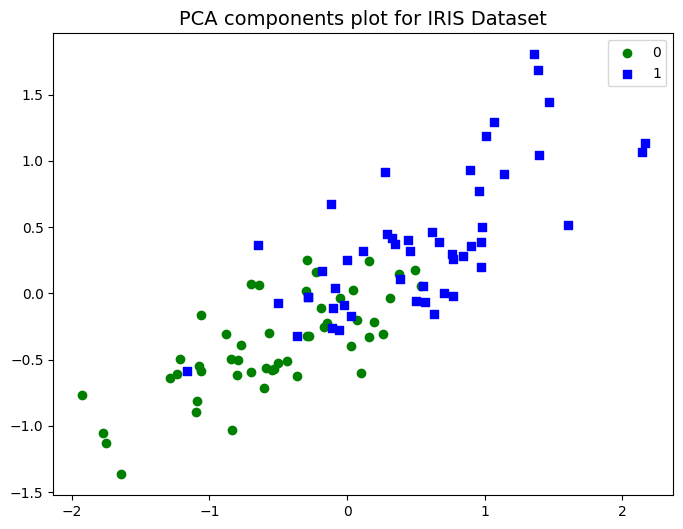

Number of components:  1
Accuracies:  [0.75, 0.85, 0.7, 0.65, 0.65, 0.65, 0.85, 0.75, 0.8, 0.6]
Average accuracy =  0.72
Number of components:  2
Accuracies:  [0.8, 0.8, 0.8, 0.9, 0.9, 0.85, 0.75, 0.65, 0.8, 0.85]
Average accuracy =  0.81
Number of components:  3
Accuracies:  [0.9, 0.85, 0.8, 0.9, 0.9, 0.9, 0.95, 0.95, 1.0, 0.95]
Average accuracy =  0.91
Number of components:  4
Accuracies:  [0.95, 0.9, 1.0, 1.0, 0.95, 0.9, 0.9, 1.0, 1.0, 0.95]
Average accuracy =  0.95


In [ ]:
# Perform zero means
u = [np.mean(X_raw[:,0]), np.mean(X_raw[:,1]), np.mean(X_raw[:,2]), np.mean(X_raw[:,3])]
XM = np.subtract(X_raw,u)  # Subtracting the mean from each feature

# Visualize the dataset with the projection to 2 principal components
X_pca = PCA(XM,2)  # Applying PCA with 2 components

plt.figure(figsize=(8,6))

# Scatter plot for class 0
plt.scatter(X_pca[0:50,0], X_pca[0:50,1], color='green', marker='o', label='0')

# Scatter plot for class 1
plt.scatter(X_pca[50:100,0], X_pca[50:100,1], color='blue', marker='s', label='1')

plt.title("PCA components plot for IRIS Dataset", fontsize=14)
plt.legend()
plt.show()

# Measuring the accuracy vs. the number of components

for i in range(4):
  num_pc = i+1
  X_hat = PCA(XM,num_pc) # Applying PCA with the current number of components
  avg_accuracies = []
  for r in range(10):
    # Call the function evaluate_accuracy
    avg_accuracies.append(svm_accuracy(X_hat, y, num_pc))  # classification accuracy with 1-4 PC
  print("Number of components: ", num_pc)
  print("Accuracies: ", avg_accuracies)
  print("Average accuracy = ", round(np.mean(avg_accuracies), 2))